In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

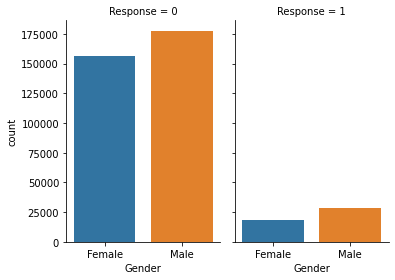

In [5]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [6]:
df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


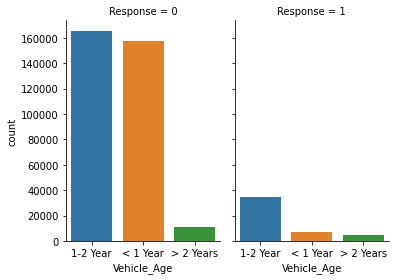

In [7]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [8]:
data.drop(['id'],inplace=True,axis=1)
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

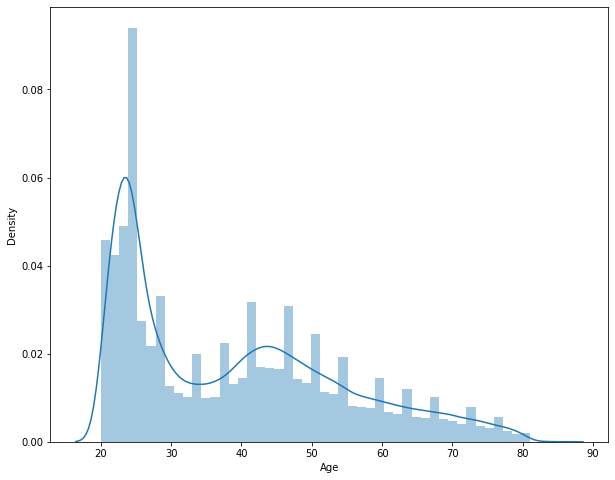

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age)
plt.show()

In [11]:
'''import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()'''

'import scipy.stats as stats\ndef diagnostic_plots(df, variable):\n    # function to plot a histogram and a Q-Q plot\n    # side by side, for a certain variable\n    \n    plt.figure(figsize=(15,6))\n    plt.subplot(1, 2, 1)\n    df[variable].hist()\n\n    plt.subplot(1, 2, 2)\n    stats.probplot(df[variable], dist="norm", plot=plt)\n\n    plt.show()'

In [12]:
#diagnostic_plots(data, 'Age')

In [13]:
#diagnostic_plots(data, 'Annual_Premium')

In [14]:
#data['Log_AP']=np.log(data['Annual_Premium']+1)
#diagnostic_plots(data,'Log_AP')

In [15]:
#data['Rec_AP']=1/(data['Annual_Premium']+1)
#diagnostic_plots(data,'Rec_AP')

In [16]:
#data['sqr_AP']=data['Annual_Premium']**(1/2)
#diagnostic_plots(data,'sqr_AP')

In [17]:
#data['Exp_AP']=data['Annual_Premium']**(1/5)
#diagnostic_plots(data,'sqr_AP')

In [18]:
#data['AP_boxcox'], param = stats.boxcox(data.Annual_Premium+1) # you can vary the exponent as needed
#
#print('Optimal lambda: ', param)

#diagnostic_plots(data, 'AP_boxcox')

In [19]:
max_age=max(data.Age)
min_age=min(data.Age)
data.Age=data.Age.apply(lambda x: (x-min_age)/(max_age-min_age))

In [20]:
#diagnostic_plots(data, 'Age')

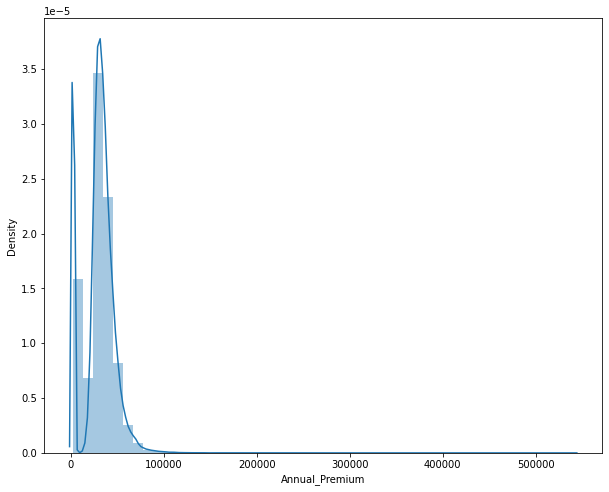

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(data.Annual_Premium)
plt.show()

In [22]:
max_premium=max(data.Annual_Premium)
min_premium=min(data.Annual_Premium)
data.Annual_Premium=data.Annual_Premium.apply(lambda x: (x-min_premium)/(max_premium-min_premium))

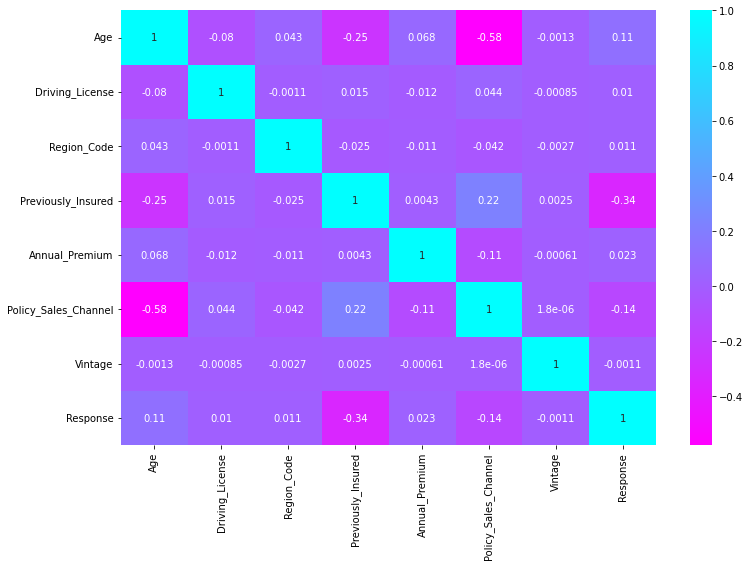

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='cool_r',annot=True)
plt.show()

In [24]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes
data.Vehicle_Age=pd.Categorical(data.Vehicle_Age,categories=['1-2 Year','< 1 Year','> 2 Years'],ordered=True).codes
data.Vehicle_Damage=pd.Categorical(data.Vehicle_Damage,categories=['Yes','No'],ordered=True).codes

In [25]:
oversample=SMOTE()
X,y=oversample.fit_resample(data.iloc[:,:10],data.iloc[:,10])

In [26]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0.369231,1,28.000000,0,2,0,0.070366,26.000000,217
1,0,0.861538,1,3.000000,0,0,1,0.057496,26.000000,183
2,0,0.415385,1,28.000000,0,2,0,0.066347,26.000000,27
3,0,0.015385,1,11.000000,1,1,1,0.048348,152.000000,203
4,1,0.138462,1,41.000000,1,1,1,0.046259,152.000000,39
...,...,...,...,...,...,...,...,...,...,...
668793,1,0.489850,1,9.230034,0,0,0,0.045550,163.000000,275
668794,0,0.167052,1,28.000000,0,0,0,0.040027,156.714599,62
668795,0,0.496808,1,6.737811,0,0,0,0.064928,26.000000,59
668796,1,0.369644,1,28.000000,0,0,0,0.050225,124.000000,23


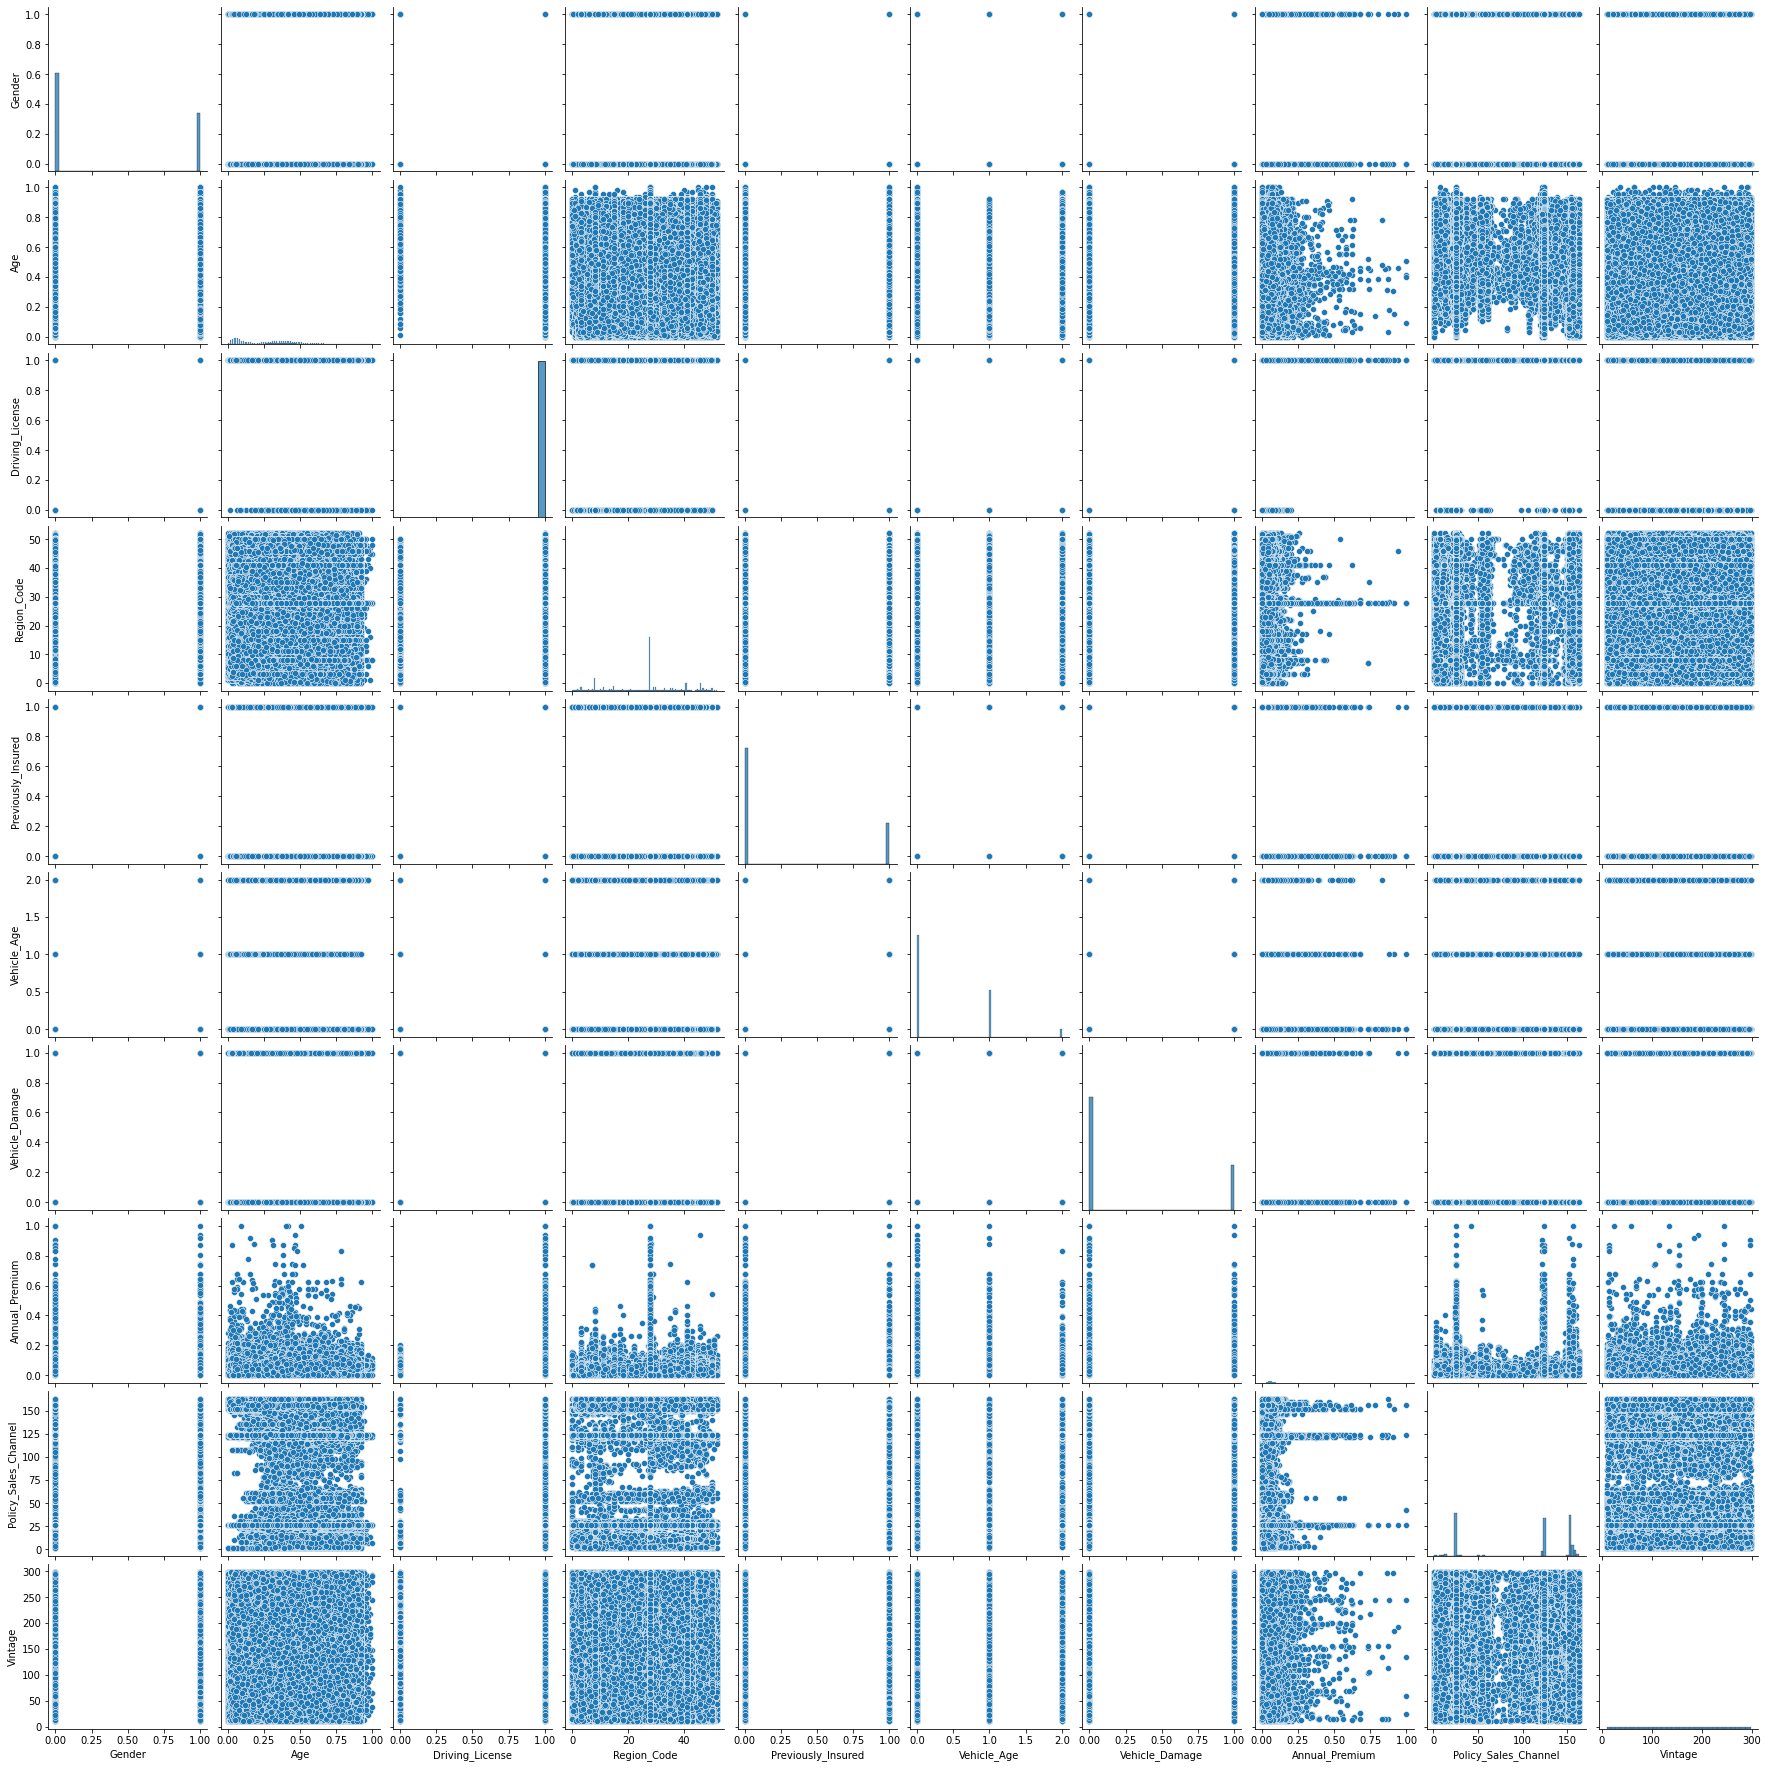

In [27]:
sns.pairplot(X)

In [28]:
y

0         1
1         0
2         1
3         0
4         0
         ..
668793    1
668794    1
668795    1
668796    1
668797    1
Name: Response, Length: 668798, dtype: int64

In [29]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.1,random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=42,max_depth=8)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(5,8)})
grid1.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8, random_state=42),
             param_grid={'max_depth': range(5, 8)})

In [31]:
grid1.best_params_

{'max_depth': 7}

In [32]:
classifier1=DecisionTreeClassifier(random_state=42,max_depth=7)
classifier1.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [33]:
pred_test_y=classifier1.predict(test_x)
pred_train_y=classifier1.predict(train_x)

In [34]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82    301112
           1       0.78      0.93      0.85    300806

    accuracy                           0.84    601918
   macro avg       0.85      0.84      0.84    601918
weighted avg       0.85      0.84      0.84    601918



In [35]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))


Classification report of test data 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82     33287
           1       0.79      0.93      0.85     33593

    accuracy                           0.84     66880
   macro avg       0.85      0.84      0.84     66880
weighted avg       0.85      0.84      0.84     66880



In [36]:
classifier2=RandomForestClassifier(random_state=42,max_depth=7)
classifier2.fit(train_x,train_y)

RandomForestClassifier(max_depth=7, random_state=42)

In [37]:
pred_test_y=classifier2.predict(test_x)
pred_train_y=classifier2.predict(train_x)

In [38]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81    301112
           1       0.76      0.96      0.85    300806

    accuracy                           0.83    601918
   macro avg       0.86      0.83      0.83    601918
weighted avg       0.86      0.83      0.83    601918



In [39]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     33287
           1       0.77      0.96      0.85     33593

    accuracy                           0.83     66880
   macro avg       0.86      0.83      0.83     66880
weighted avg       0.86      0.83      0.83     66880



In [40]:
classifier3=LogisticRegression(solver='liblinear')
classifier3.fit(train_x,train_y)

LogisticRegression(solver='liblinear')

In [41]:
pred_test_y=classifier3.predict(test_x)
pred_train_y=classifier3.predict(train_x)

In [42]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.97      0.61      0.75    301112
           1       0.71      0.98      0.83    300806

    accuracy                           0.79    601918
   macro avg       0.84      0.79      0.79    601918
weighted avg       0.84      0.79      0.79    601918



In [43]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.97      0.61      0.75     33287
           1       0.72      0.98      0.83     33593

    accuracy                           0.80     66880
   macro avg       0.84      0.80      0.79     66880
weighted avg       0.84      0.80      0.79     66880



In [44]:
classifier4=KNeighborsClassifier()
classifier4.fit(train_x,train_y)

KNeighborsClassifier()

In [45]:
classifier4=KNeighborsClassifier()
classifier4.fit(train_x,train_y)

KNeighborsClassifier()

In [46]:
pred_test_y=classifier4.predict(test_x)
pred_train_y=classifier4.predict(train_x)

In [47]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83     33287
           1       0.79      0.95      0.86     33593

    accuracy                           0.85     66880
   macro avg       0.86      0.85      0.85     66880
weighted avg       0.86      0.85      0.85     66880



In [48]:
print(confusion_matrix(pred_test_y, test_y))

[[24779  1651]
 [ 8508 31942]]


In [49]:
classifier5=XGBClassifier()
classifier5.fit(train_x,train_y)

[13:47:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
pred_test_y=classifier5.predict(test_x)
pred_train_y=classifier5.predict(train_x)

In [51]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    301112
           1       0.95      0.87      0.91    300806

    accuracy                           0.92    601918
   macro avg       0.92      0.92      0.92    601918
weighted avg       0.92      0.92      0.92    601918



In [52]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    301112
           1       0.95      0.87      0.91    300806

    accuracy                           0.92    601918
   macro avg       0.92      0.92      0.92    601918
weighted avg       0.92      0.92      0.92    601918



In [53]:
classifier8=LinearSVC()
classifier8.fit(train_x,train_y)

LinearSVC()

In [54]:
pred_test_y=classifier8.predict(test_x)
pred_train_y=classifier8.predict(train_x)

In [55]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.99      0.58      0.73    301112
           1       0.70      1.00      0.83    300806

    accuracy                           0.79    601918
   macro avg       0.85      0.79      0.78    601918
weighted avg       0.85      0.79      0.78    601918



In [56]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     33287
           1       0.71      1.00      0.83     33593

    accuracy                           0.79     66880
   macro avg       0.85      0.79      0.78     66880
weighted avg       0.85      0.79      0.78     66880



In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [58]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [59]:
model.fit(x=train_x, y=train_y, epochs=50, validation_data=(test_x, test_y))

2022-03-07 13:51:02.650238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
18810/18810 [==============================] - 71s 4ms/step - loss: 0.6902 - val_loss: 0.4346
Epoch 2/50
18810/18810 [==============================] - 71s 4ms/step - loss: 0.4386 - val_loss: 0.4200
Epoch 3/50
18810/18810 [==============================] - 71s 4ms/step - loss: 0.4305 - val_loss: 0.4532
Epoch 4/50
18810/18810 [==============================] - 72s 4ms/step - loss: 0.4288 - val_loss: 0.4424
Epoch 5/50
18810/18810 [==============================] - 71s 4ms/step - loss: 0.4279 - val_loss: 0.4303
Epoch 6/50
18810/18810 [==============================] - 74s 4ms/step - loss: 0.4264 - val_loss: 0.4320
Epoch 7/50
18810/18810 [==============================] - 68s 4ms/step - loss: 0.4259 - val_loss: 0.4277
Epoch 8/50
18810/18810 [==============================] - 71s 4ms/step - loss: 0.4257 - val_loss: 0.4270
Epoch 9/50
18810/18810 [==============================] - 69s 4ms/step - loss: 0.4252 - val_loss: 0.4218
Epoch 10/50
18810/18810 [==============================

<AxesSubplot:>

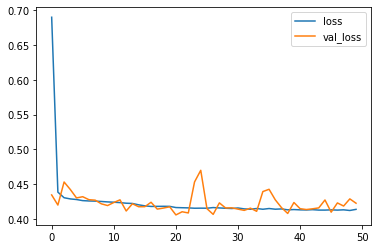

In [60]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [61]:
pred = model.predict(test_x)
pred = np.round(pred)
print(confusion_matrix(pred, test_y))

[[20715   458]
 [12572 33135]]


In [62]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     33287
           1       0.72      0.99      0.84     33593

    accuracy                           0.81     66880
   macro avg       0.85      0.80      0.80     66880
weighted avg       0.85      0.81      0.80     66880



In [63]:
dt_pred_test_y=classifier1.predict(test_x)
rf_pred_test_y=classifier2.predict(test_x)
lr_pred_test_y=classifier3.predict(test_x)
kn_pred_test_y=classifier4.predict(test_x)
xg_pred_test_y=classifier5.predict(test_x)
sv_pred_test_y=classifier8.predict(test_x)


In [64]:
ann_pred_test_y = model.predict(test_x)
ann_pred_test_y = np.round(ann_pred_test_y)

In [65]:
pip install plot-metric

Note: you may need to restart the kernel to use updated packages.


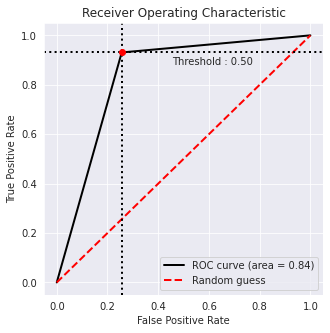

In [66]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc1 = BinaryClassification(test_y, dt_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc1.plot_roc_curve()
plt.show()

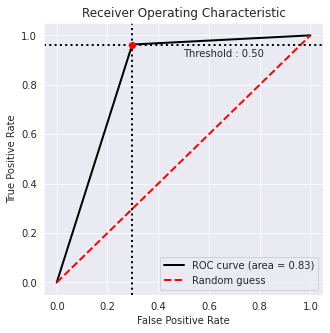

In [67]:
bc2 = BinaryClassification(test_y, rf_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc2.plot_roc_curve()
plt.show()

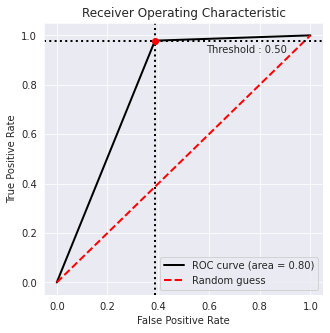

In [68]:
bc3 = BinaryClassification(test_y, lr_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc3.plot_roc_curve()
plt.show()

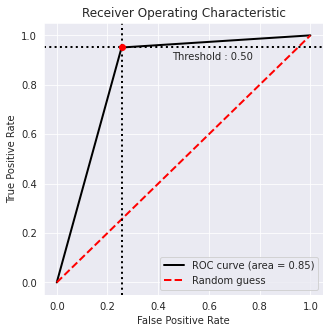

In [69]:
bc4 = BinaryClassification(test_y, kn_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc4.plot_roc_curve()
plt.show()

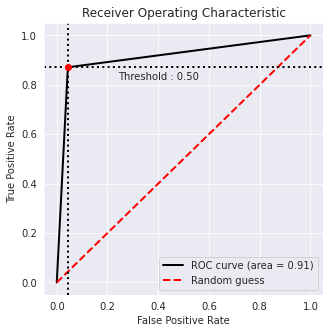

In [70]:
bc5 = BinaryClassification(test_y, xg_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc5.plot_roc_curve()
plt.show()

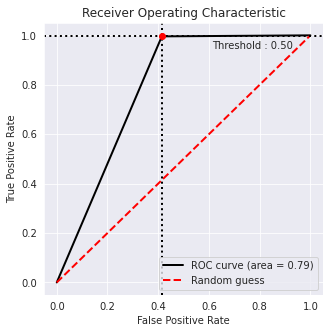

In [71]:
bc6 = BinaryClassification(test_y, sv_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc6.plot_roc_curve()
plt.show()

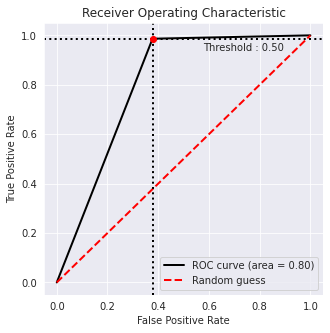

In [72]:
bc7 = BinaryClassification(test_y, ann_pred_test_y, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc7.plot_roc_curve()
plt.show()